### Problem Statement

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 



In [4]:
#importing libraries 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("train_ctrUa4K.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data Dictionary

- Loan_ID	- Unique Loan ID
- Gender	- Male/ Female
- Married	- Applicant married (Y/N)
- Dependents - Number of dependents
- Education -	Applicant Education (Graduate/ Under Graduate)
- Self_Employed -	Self employed (Y/N)
- ApplicantIncome -	Applicant income
- CoapplicantIncome -	Coapplicant income
- LoanAmount -	Loan amount in thousands
- Loan_Amount_Term -	Term of loan in months
- Credit_History -	credit history meets guidelines
- Property_Area -	Urban/ Semi Urban/ Rural
- Loan_Status -	(Target) Loan approved (Y/N)

### Hypothesis
1. Property_Area is urban/semi urban will have loan accepted, in rural rejected
2. Credit_History meets guidelines, then accepted else rejected
3. Married people with depend always get loan accepted
4. Applicant income higher than mean or median then their loan accepted.
5. 

In [16]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [21]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [25]:
#lets identify the features which are categorical vs continuous
data.Gender = data.Gender.astype('category')
data.Married = data.Married.astype('category')
data.Dependents = data.Dependents.astype('category')
data.Education = data.Education.astype('category')
data.Self_Employed = data.Self_Employed.astype('category')
data.Credit_History = data.Credit_History.astype('category')
data.Property_Area = data.Property_Area.astype('category')


In [26]:
data.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area        category
Loan_Status            object
dtype: object

<AxesSubplot:>

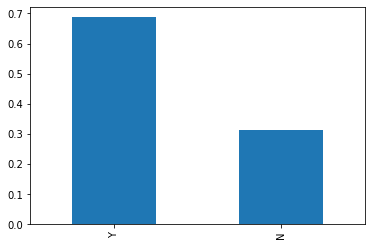

In [29]:
#lets review the target variable:
data.Loan_Status.value_counts(normalize=True).plot.bar()

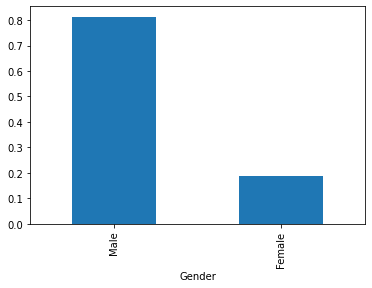

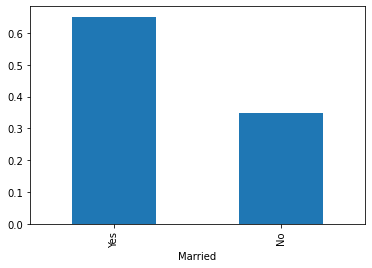

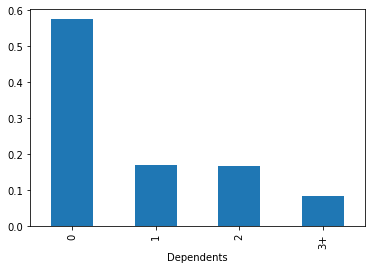

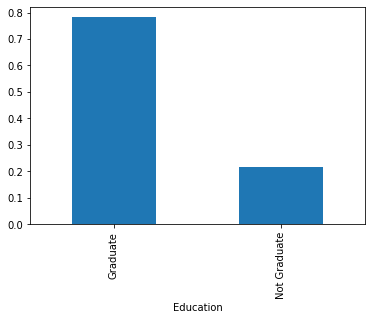

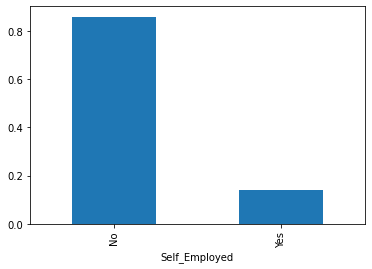

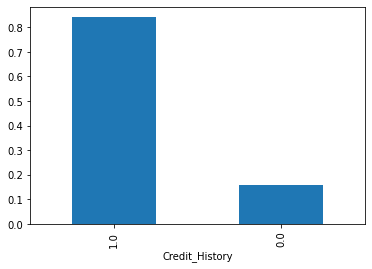

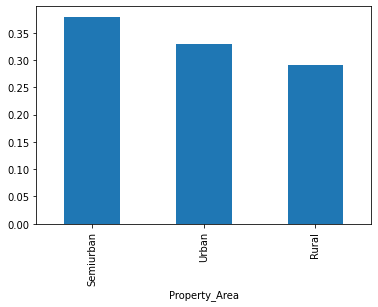

In [78]:
#lets review all categorical data
categorical_data = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']
size = len(categorical_data)
#plt.figure(figsize=(10*size, 5))

for j,i in enumerate(categorical_data):
    #plt.subplot(1, size, j+1)
    data[i].value_counts(normalize=True).plot.bar()
    plt.xlabel(i)
    plt.show()

### Insights from Univariate Analysis of Categorical Data

- Majority applicants are from Rural Area
- 80% people have past credit history
- Only 15% people are self employeed
- ~57% of population donot have any dependents
- 80% of loan applications are from Men

In [72]:
data.dtypes

Loan_ID                object
Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History       category
Property_Area        category
Loan_Status            object
dtype: object

c:\Users\Neelam\Desktop\Desktop\Python\Video\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Neelam\Desktop\Desktop\Python\Video\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


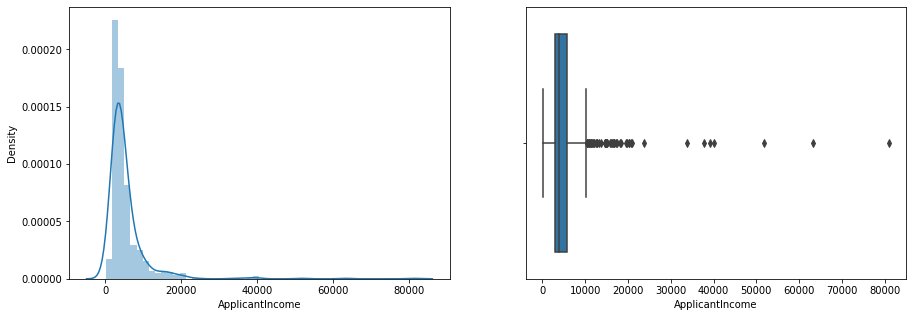

c:\Users\Neelam\Desktop\Desktop\Python\Video\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Neelam\Desktop\Desktop\Python\Video\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


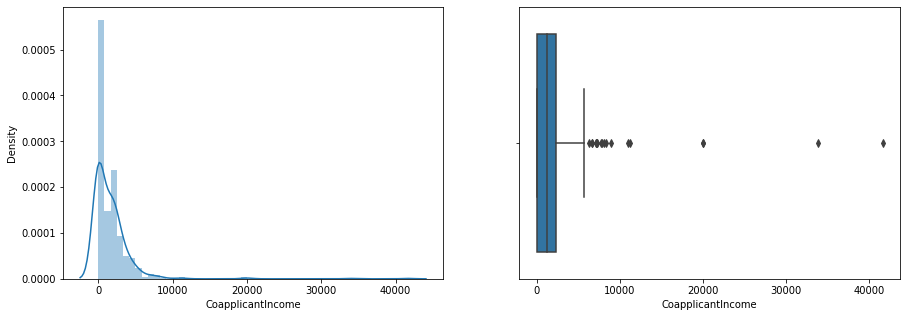

c:\Users\Neelam\Desktop\Desktop\Python\Video\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Neelam\Desktop\Desktop\Python\Video\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


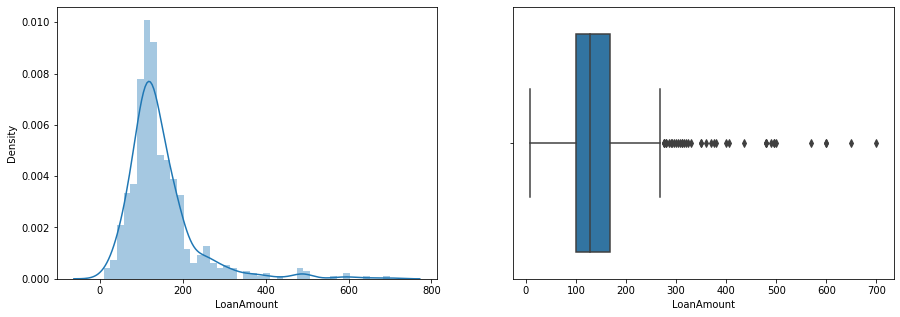

c:\Users\Neelam\Desktop\Desktop\Python\Video\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Neelam\Desktop\Desktop\Python\Video\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


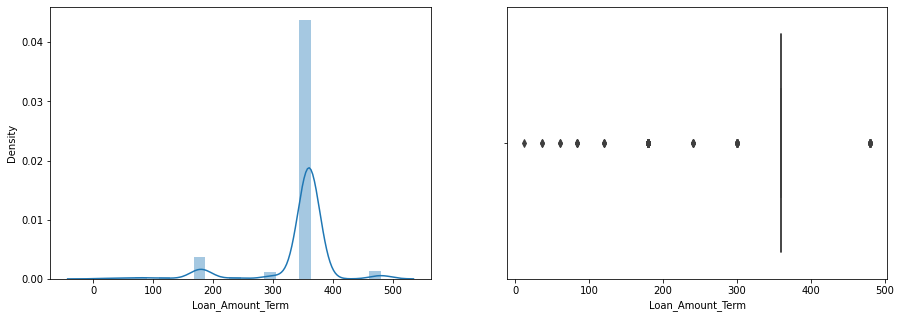

In [92]:
#lets review all continuous data
continuous_data = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

size = len(continuous_data)
#plt.figure(figsize=(5, 10))

for j, i in enumerate(continuous_data):
    #plt.subplot(size, 1, j+1)
    plt.figure(figsize=(15,5))
    plt.xlabel(i)
    plt.subplot(1,2,1)
    sns.distplot(data[i])
    plt.subplot(1,2,2)
    sns.boxplot(data[i])
    plt.show()

There is a lot of disparity in income. Lets check how income is impacted by education

Text(0.5, 0.98, '')

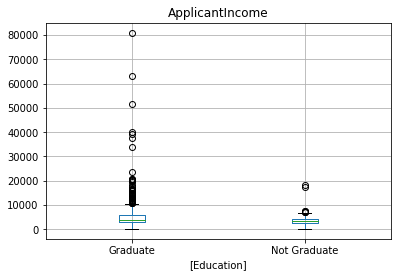

In [96]:
data.boxplot(column='ApplicantIncome', by=["Education"]) 
plt.suptitle("")

Text(0.5, 0.98, '')

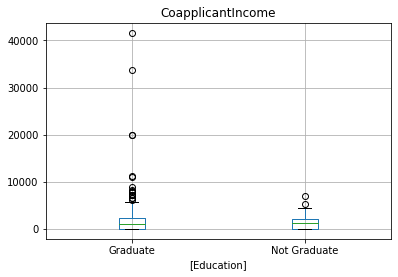

In [97]:
data.boxplot(column='CoapplicantIncome', by=["Education"]) 
plt.suptitle("")

## Bivariate Analysis

Lets recall the hypothesis which will help in Bivariate Analysis

1. Property_Area is urban/semi urban will have loan accepted, in rural rejected
2. Credit_History meets guidelines, then accepted else rejected
3. Married people with depend always get loan accepted
4. Applicant income higher than mean or median then their loan accepted.
5. If loan amount is less, then more chances of loan approval
6. Less amount to be paid monthly, higher chance of loan approval